# Fundamentos de Aprendizaje Automático
## _Práctica 2: K-NN y K-MEANS_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

Importes:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from abc import ABCMeta,abstractmethod
import numpy as np
from Datos import Datos
from Clasificador import *
import EstrategiaParticionado as EstrategiaParticionado
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from EstrategiaParticionado import ValidacionSimple as validacionSimple
from Kmeans import KMeans

Carga de datasets:

In [85]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
dataset3 = Datos('ConjuntosDatosP2/iris.csv')

### Decisiones de diseño:

 A la hora de realizar el diseño, tomamos una decisión inicial que creíamos sería óptima, pero una vez realizada la práctica hemos llegado a la conclusión de que no así. La clase ideal para ubicar los métodos de normalización de los datos sería en la propia clase Datos. De esta forma, todas las operaciones que se hagan sobre un dataset, queda en la clase que se dedica a trabajar sobre este. El inconveniente que tiene ubicarlo en la clase Clasificador, que es como lo hemos hecho nosotros, es que cada vez que quieras normalizar los datos quedas supeditado a tener creado un objeto clasificador que seguramente ni necesites, quizá porque no estas clasificando y simplemente quieres normalizar datos de un dataset por otro motivo. Lo ideal es tener las operaciones sobre datos, en la clase Datos. Como nos hemos dado cuenta a posteriori, lo mantenemos así en nuestro código 

# Apartado 1: Algoritmo K-NN

Hacemos que el clasificador sea K-NN y cargo su dataset:

In [88]:
errores = []
validacionSimple = EstrategiaParticionado.ValidacionSimple(10,5) #
clasificador = ClasificadorKNN()

Vamos a realizar pruebas para K = 1, K = 3 y K = 5, siempre impares para que no pueda haber empates

## Para pima-indians-diabetes:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [89]:
validacionSimple.creaParticiones(dataset1.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [6]:
K = 1

Mostramos el error mediante un bucle:

In [7]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [8]:
err_diabetes_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

37.89%


#### Normalizando los datos:

In [9]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

    Pregs Plas Pres Skin Test  Mass   Pedi Age Class
0       6  148   72   35    0  33.6  0.627  50     1
1       1   85   66   29    0  26.6  0.351  31     0
2       8  183   64    0    0  23.3  0.672  32     1
3       1   89   66   23   94  28.1  0.167  21     0
4       0  137   40   35  168  43.1  2.288  33     1
..    ...  ...  ...  ...  ...   ...    ...  ..   ...
763    10  101   76   48  180  32.9  0.171  63     0
764     2  122   70   27    0  36.8  0.340  27     0
765     5  121   72   23  112  26.2  0.245  30     0
766     1  126   60    0    0  30.1  0.349  47     1
767     1   93   70   31    0  30.4  0.315  23     0

[768 rows x 9 columns]
        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.599110  1.901133  0.562975 -0.088497 -0.704754 -0.113147 -0.693714   
1   -0.687147  0.791870  0.457331 -0.194141 -0.704754 -0.236399 -0.698574   
2   -0.563895  2.517390  0.422116 -0.704754 -0.704754 -0.294503 -0.692922   
3   -0.687147  0.862300  0.45733

Mostramos el error mediante un bucle:

In [10]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [11]:
err_diabetes_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

34.61%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [12]:
K = 3

Mostramos el error mediante un bucle:

In [13]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [14]:
err_diabetes_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

33.33%


#### Normalizando los datos:

In [15]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.599110  1.901133  0.562975 -0.088497 -0.704754 -0.113147 -0.693714   
1   -0.687147  0.791870  0.457331 -0.194141 -0.704754 -0.236399 -0.698574   
2   -0.563895  2.517390  0.422116 -0.704754 -0.704754 -0.294503 -0.692922   
3   -0.687147  0.862300  0.457331 -0.299785  0.950336 -0.209988 -0.701814   
4   -0.704754  1.707452 -0.000460 -0.088497  2.253280  0.054122 -0.664468   
..        ...       ...       ...       ...       ...       ...       ...   
763 -0.528681  1.073588  0.633404  0.140398  2.464568 -0.125472 -0.701743   
764 -0.669539  1.443342  0.527760 -0.229356 -0.704754 -0.056804 -0.698768   
765 -0.616717  1.425735  0.562975 -0.299785  1.267268 -0.243442 -0.700440   
766 -0.687147  1.513771  0.351687 -0.704754 -0.704754 -0.174773 -0.698609   
767 -0.687147  0.932729  0.527760 -0.158926 -0.704754 -0.169491 -0.699208   

          Age Class  
0    0.175613     1  
1   -0.158926     0  
2   -0.14

Mostramos el error mediante un bucle:

In [16]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [17]:
err_diabetes_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

32.37%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [18]:
K = 5

Mostramos el error mediante un bucle:

In [19]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [20]:
err_diabetes_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

31.47%


#### Normalizando los datos:

In [21]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.726117  1.811202  0.453201 -0.207932 -0.833327 -0.232948 -0.822124   
1   -0.815459  0.685490  0.345990 -0.315143 -0.833327 -0.358027 -0.827056   
2   -0.690380  2.436598  0.310253 -0.833327 -0.833327 -0.416993 -0.821320   
3   -0.815459  0.756964  0.345990 -0.422353  0.846306 -0.331224 -0.830343   
4   -0.833327  1.614649 -0.118590 -0.207932  2.168571 -0.063197 -0.792444   
..        ...       ...       ...       ...       ...       ...       ...   
763 -0.654643  0.971385  0.524674  0.024358  2.382992 -0.245456 -0.830272   
764 -0.797591  1.346623  0.417464 -0.350879 -0.833327 -0.175769 -0.827252   
765 -0.743985  1.328754  0.453201 -0.422353  1.167938 -0.365174 -0.828950   
766 -0.815459  1.418097  0.238779 -0.833327 -0.833327 -0.295487 -0.827091   
767 -0.815459  0.828438  0.417464 -0.279406 -0.833327 -0.290127 -0.827699   

          Age Class  
0    0.060095     1  
1   -0.279406     0  
2   -0.26

Mostramos el error mediante un bucle:

In [22]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [23]:
err_diabetes_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

30.53%


## Para wdbc:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [90]:
validacionSimple.creaParticiones(dataset2.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [91]:
K = 1

Mostramos el error mediante un bucle:

In [92]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [93]:
err_wdbc_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

9.29%


#### Normalizando los datos:

In [94]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

    Atributo1 Atributo2 Atributo3 Atributo4 Atributo5 Atributo6 Atributo7  \
0       17.99     10.38     122.8      1001    0.1184    0.2776    0.3001   
1       20.57     17.77     132.9      1326   0.08474   0.07864    0.0869   
2       19.69     21.25       130      1203    0.1096    0.1599    0.1974   
3       11.42     20.38     77.58     386.1    0.1425    0.2839    0.2414   
4       20.29     14.34     135.1      1297    0.1003    0.1328     0.198   
..        ...       ...       ...       ...       ...       ...       ...   
564     21.56     22.39       142      1479     0.111    0.1159    0.2439   
565     20.13     28.25     131.2      1261    0.0978    0.1034     0.144   
566      16.6     28.08     108.3     858.1   0.08455    0.1023   0.09251   
567      20.6     29.33     140.1      1265    0.1178     0.277    0.3514   
568      7.76     24.54     47.92       181   0.05263   0.04362         0   

    Atributo8 Atributo9 Atributo10  ... Atributo22 Atributo23 Atributo24  \

Mostramos el error mediante un bucle:

In [95]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [96]:
err_wdbc_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

7.68%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [97]:
K = 3

Mostramos el error mediante un bucle:

In [131]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [132]:
err_wdbc_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

5.90%


#### Normalizando los datos:

In [133]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

     Atributo1  Atributo2  Atributo3  Atributo4  Atributo5  Atributo6  \
0    -0.234025  -0.266711   0.216152   3.988174  -0.310786  -0.310102   
1    -0.222943  -0.234970   0.259534   5.384105  -0.310931  -0.310957   
2    -0.226723  -0.220022   0.247078   4.855798  -0.310824  -0.310608   
3    -0.262244  -0.223759   0.021925   1.347072  -0.310683  -0.310075   
4    -0.224146  -0.249702   0.268983   5.259545  -0.310864  -0.310724   
..         ...        ...        ...        ...        ...        ...   
564  -0.218691  -0.215126   0.298620   6.041266  -0.310818  -0.310797   
565  -0.224833  -0.189956   0.252232   5.104919  -0.310875  -0.310851   
566  -0.239995  -0.190686   0.153872   3.374393  -0.310932  -0.310855   
567  -0.222814  -0.185317   0.290459   5.122099  -0.310789  -0.310105   
568  -0.277964  -0.205891  -0.105470   0.466132  -0.311069  -0.311107   

     Atributo7  Atributo8  Atributo9  Atributo10  ...  Atributo22  Atributo23  \
0    -0.310006  -0.310663  -0.310256   -0.

Mostramos el error mediante un bucle:

In [134]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [135]:
err_wdbc_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

5.96%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [136]:
K = 5

Mostramos el error mediante un bucle:

In [137]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [138]:
err_wdbc_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.01%


#### Normalizando los datos:

In [139]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

     Atributo1  Atributo2  Atributo3  Atributo4  Atributo5  Atributo6  \
0    -0.234208  -0.266880   0.215783   3.986242  -0.310937  -0.310254   
1    -0.223131  -0.235152   0.259146   5.381596  -0.311082  -0.311108   
2    -0.226909  -0.220211   0.246696   4.853508  -0.310975  -0.310759   
3    -0.262415  -0.223946   0.021636   1.346234  -0.310834  -0.310227   
4    -0.224333  -0.249878   0.268592   5.257087  -0.311015  -0.310876   
..         ...        ...        ...        ...        ...        ...   
564  -0.218880  -0.215317   0.298216   6.038485  -0.310969  -0.310948   
565  -0.225020  -0.190157   0.251848   5.102525  -0.311026  -0.311002   
566  -0.240175  -0.190887   0.153529   3.372716  -0.311083  -0.311007   
567  -0.223002  -0.185521   0.290059   5.119699  -0.310940  -0.310257   
568  -0.278129  -0.206086  -0.105706   0.465659  -0.311220  -0.311258   

     Atributo7  Atributo8  Atributo9  Atributo10  ...  Atributo22  Atributo23  \
0    -0.310157  -0.310814  -0.310407   -0.

Mostramos el error mediante un bucle:

In [140]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [141]:
err_wdbc_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.06%


## Para iris:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [142]:
validacionSimple.creaParticiones(dataset3.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [143]:
K = 1

Mostramos el error mediante un bucle:

In [144]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [145]:
err_iris_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

5.94%


#### Normalizando los datos:

In [146]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

           SL        SW        PL        PW  Class
0    0.189377 -0.357912 -1.076229 -1.486696      1
1    0.120966 -0.528940 -1.076229 -1.486696      1
2    0.052554 -0.460529 -1.110434 -1.486696      1
3    0.018349 -0.494734 -1.042023 -1.486696      1
4    0.155171 -0.323707 -1.076229 -1.486696      1
..        ...       ...       ...       ...    ...
145  0.736666 -0.528940  0.223582 -0.768379      3
146  0.599843 -0.699968  0.155171 -0.905201      3
147  0.668254 -0.528940  0.223582 -0.870996      3
148  0.565638 -0.392118  0.291993 -0.768379      3
149  0.463021 -0.528940  0.189377 -0.939407      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0    0.072463 -0.390571 -0.998305 -1.345581      1
1    0.014584 -0.535270 -0.998305 -1.345581      1
2   -0.043295 -0.477390 -1.027244 -1.345581      1
3   -0.072235 -0.506330 -0.969365 -1.345581      1
4    0.043524 -0.361632 -0.998305 -1.345581      1
..        ...       ...       ...       ...    ...
145  0.

Mostramos el error mediante un bucle:

In [147]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [148]:
err_iris_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.05%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [149]:
K = 3

Mostramos el error mediante un bucle:

In [150]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [151]:
err_iris_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.02%


#### Normalizando los datos:

In [152]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

           SL        SW        PL        PW  Class
0    0.072463 -0.390571 -0.998305 -1.345581      1
1    0.014584 -0.535270 -0.998305 -1.345581      1
2   -0.043295 -0.477390 -1.027244 -1.345581      1
3   -0.072235 -0.506330 -0.969365 -1.345581      1
4    0.043524 -0.361632 -0.998305 -1.345581      1
..        ...       ...       ...       ...    ...
145  0.535498 -0.535270  0.101403 -0.737848      3
146  0.419739 -0.679968  0.043524 -0.853606      3
147  0.477619 -0.535270  0.101403 -0.824667      3
148  0.390800 -0.419511  0.159282 -0.737848      3
149  0.303981 -0.535270  0.072463 -0.882546      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0   -0.005810 -0.409313 -0.938909 -1.241536      1
1   -0.056248 -0.535407 -0.938909 -1.241536      1
2   -0.106686 -0.484969 -0.964128 -1.241536      1
3   -0.131905 -0.510188 -0.913691 -1.241536      1
4   -0.031029 -0.384094 -0.938909 -1.241536      1
..        ...       ...       ...       ...    ...
145  0.

Mostramos el error mediante un bucle:

In [153]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [154]:
err_iris_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.36%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [155]:
K = 5

Mostramos el error mediante un bucle:

In [156]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [157]:
err_iris_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.19%


#### Normalizando los datos:

In [158]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

           SL        SW        PL        PW  Class
0   -0.005810 -0.409313 -0.938909 -1.241536      1
1   -0.056248 -0.535407 -0.938909 -1.241536      1
2   -0.106686 -0.484969 -0.964128 -1.241536      1
3   -0.131905 -0.510188 -0.913691 -1.241536      1
4   -0.031029 -0.384094 -0.938909 -1.241536      1
..        ...       ...       ...       ...    ...
145  0.397692 -0.535407  0.019408 -0.711939      3
146  0.296816 -0.661502 -0.031029 -0.812815      3
147  0.347254 -0.535407  0.019408 -0.787596      3
148  0.271597 -0.434532  0.069846 -0.711939      3
149  0.195941 -0.535407 -0.005810 -0.838034      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0   -0.063093 -0.421505 -0.891921 -1.160730      1
1   -0.107894 -0.533508 -0.891921 -1.160730      1
2   -0.152696 -0.488707 -0.914321 -1.160730      1
3   -0.175096 -0.511108 -0.869520 -1.160730      1
4   -0.085493 -0.399104 -0.891921 -1.160730      1
..        ...       ...       ...       ...    ...
145  0.

Mostramos el error mediante un bucle:

In [159]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [160]:
err_iris_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

6.56%


## Comparación de errores:

Errores pima-indians-diabetes:

In [ ]:
print('Para K = 1:')
print('Error para pima-indians-diabetes k=1: ' + err_diabetes_k1)
print('Error para pima-indians-diabetes k=1 normalizado: ' + err_diabetes_k1_norm)
print('\nPara K = 3:')
print('Error para pima-indians-diabetes k=3: ' + err_diabetes_k3)
print('Error para pima-indians-diabetes k=3 normalizado: ' + err_diabetes_k3_norm)
print('\nError para K = 5:')
print('Error para pima-indians-diabetes k=5: ' + err_diabetes_k5)
print('Error para pima-indians-diabetes k=5 normalizado: ' + err_diabetes_k5_norm)


Para K = 1:
Error para pima-indians-diabetes k=1: 37.89%
Error para pima-indians-diabetes k=1 normalizado: 34.61%

Para K = 3:
Error para pima-indians-diabetes k=3: 33.33%
Error para pima-indians-diabetes k=3 normalizado: 32.37%

Error para K = 5:
Error para pima-indians-diabetes k=5: 31.47%
Error para pima-indians-diabetes k=5 normalizado: 30.53%


Errores wdbc:

In [161]:
print('Para K = 1:')
print('Error para wdbc k=1: ' + err_wdbc_k1)
print('Error para wdbc k=1 normalizado: ' + err_wdbc_k1_norm)
print('\nPara K = 3:')
print('Error para wdbc k=3: ' + err_wdbc_k3)
print('Error para wdbc k=3 normalizado: ' + err_wdbc_k3_norm)
print('\nError para K = 5:')
print('Error para wdbc k=5: ' + err_wdbc_k5)
print('Error para wdbc k=5 normalizado: ' + err_wdbc_k5_norm)

Para K = 1:
Error para wdbc k=1: 9.29%
Error para wdbc k=1 normalizado: 7.68%

Para K = 3:
Error para wdbc k=3: 5.90%
Error para wdbc k=3 normalizado: 5.96%

Error para K = 5:
Error para wdbc k=5: 6.01%
Error para wdbc k=5 normalizado: 6.06%


Errores iris:

In [162]:
print('Para K = 1:')
print('Error para iris k=1: ' + err_iris_k1)
print('Error para iris k=1 normalizado: ' + err_iris_k1_norm)
print('\nPara K = 3:')
print('Error para iris k=3: ' + err_iris_k3)
print('Error para iris k=3 normalizado: ' + err_iris_k3_norm)
print('\nError para K = 5:')
print('Error para iris k=5: ' + err_iris_k5)
print('Error para iris k=5 normalizado: ' + err_iris_k5_norm)

Para K = 1:
Error para iris k=1: 5.94%
Error para iris k=1 normalizado: 6.05%

Para K = 3:
Error para iris k=3: 6.02%
Error para iris k=3 normalizado: 6.36%

Error para K = 5:
Error para iris k=5: 6.19%
Error para iris k=5 normalizado: 6.56%


### Observaciones y discursión de resultados:

* Si nos fijamos en los resultados de la normalización de los datos con la que no está normalizada podemos ver que en la gran mayoría de los casos que, cuando hemos normalizado los datos, el error será algo menor, esto sucede menos en el dataset de pima-indians-diabetes.

* Lo primero que se observa al comparar los resultados de K = 1, K = 3 y K = 5, es que cuanto mayor sea la K menor es el error entre ellos, para wdbc e iris esta diferencia se observa bien, aunque como para el caso de la normalización, en pima-indians-diabetes los resultados no disminuyen o aumentan basandose en una K u otra.

* Podemos ver, a través de varias ejecuciones realizadas, que los resultados para K = 1 no son buenos para comparar con los resultados, ya que con solo 1 los resultados son demasiado imprecisos, nos centraremos entonces en los valores para K = 3 y K = 5.

* Si miramos los valores para K = 3 o K = 5, se puede observar una diferencia clara entre los datos normalizados y sin normalizar siendo el error menor el normalizado. Para K = 5 casi siempre se tiene un error menor general.

* Se hará una comparación del rendimiento del algoritmo en el apartado 3 al compararlo con el algoritmo de la libreria de Scikit-learn

# Apartado 2: Algoritmo K-Means

##### Discusion de los resultados
En nuestro desarrollo del algoritmo K-Means, existe un pequeño error que hace que en determinadas ejecuciones los valores no den correctos. Esto es debido a que al hacer el recalculo de los centroides en ocasiones el valor medio de la clase obtiene decimales y por lo tanto, la clase del centroide de algun cluster es impreciso. Esto sucede de manera esporádica e imprevisible dependiendo del centroide incial que se elija. Para discutir los resultados vamos a forzar a que sea una de las ejecuciones correctas, para poder hacer una conclusion de los resultados justificada:

El constructor de la clase recibe el numero de clusters que vamos a utilizar para nuestro algoritmo:

In [9]:
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(1)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

66.67%


In [10]:
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(2)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

33.33%


En los dos casos anteriores tenemos resultados previsibles y esperados. ¿Por qué? nuestro dataset se compone de 3 posibles clases solución. Si nosotros elegimos un numero de clusters menor al numero total de clases que puede haber, los resultados van a ser malos. Nunca vamos a poder predecir más clases que el numero de clusters y por lo tanto para nuestro dataset en particular, si elegimos 1 cluster, se nos quedan 2 clases sin predecir, y si elegimos 2 clusters se nos queda 1 sin predecir. Como el dataset es bastante completo y equilibrado, hemos observado que el de filas por cada clase es el mismo, y por lo tanto es fácil concluir que si se quedan 2 clases sin referenciar es el 66% y si se queda 1 sin referenciar es el 33%.

In [11]:
error = []
dataset = Datos('ConjuntosDatosP2/iris.csv')
km = KMeans(3)  
km.fit(dataset.datos)
print(f'{km.error(dataset.datos) * 100:.2f}%')

1.33%


Aqui ya vemos que la diferencia es notable. Ahora tenemos 3 cluster, con 3 posibles clases para predecir. Lo que nos ayuda a responder a la primera cuestión. 
¿Se puede asignar de forma unívoca cada cluster a un tipo de flor atendiendo a la clase mayoritaria de los patrones agrupados?

In [12]:
print(km.clusterAlQuePertenece)
print(km.centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[6.624 2.984 5.562 2.026 2.98 ]
 [5.006 3.418 1.464 0.244 1.   ]
 [5.9   2.76  4.25  1.326 2.02 ]]


Claramente vemos que sí. Arriba observamos, tras toda la ejecución, el cluster al que pertenece cada fila de nuestro dataset, y a continuación, el centroide de los cluster solución. 

Observamos claramente que cada cluster termina representando un tipo de flor. 

También es interesante comentar el error del que hablabamos antes. Al trabajar con numpy, las clases toman un valor decimal, y al ir calculando la media, van perdiendo precision. Y hemos tenido que usar round() para estimar el error. 
Es un pequeño error del desarrollo pero no hemos tenido tiempo de ajustarlo. 

No obstante nos ofrece la informacion suficiente para poder realizar un estudio de los resultados y una buena conclusión. Porque además nos va a permitir ver algún detalle extra como vamos a ver a continuacion:



In [38]:
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km1 = KMeans(3)  
    km1.fit(dataset.datos)
    errores.append(km1.error(dataset.datos) * 100)
print(f'Error medio para clusters de 3:{np.mean(errores):.2f}%')
    
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km2 = KMeans(5)  
    km2.fit(dataset.datos)
    errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 5:{np.mean(errores):.2f}%')
    

Error medio para clusters de 3:5.76%
Error medio para clusters de 5:1.55%


Como decíamos antes, hemos buscado una buena ejecución para discutir los resultados, pero si atendemos a la media de los resultados vemos un curioso detalle. El algoritmo mejora su actuación si le ofrecemos más clusters sobre el que valorar cual es la mejor opción. Esto se debe a que, al tener un valor de clase impreciso, si le ofrecemos otra alternativa sobre el que calcular la distancia puede llegar a una mejor conclusión. Por así decirlo, tiene como 2 alternativas para valorar a cual tiene una menor distancia. Esto no funciona si seguimos aumentando clusters, ya que no estaríamos haciendo un sobreentrenamiento y al final no llegaría a una buena predicción. 

In [42]:
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km1 = KMeans(3)  
    km1.calcularMediaDesviacion(dataset.datos,dataset.nominalAtributos)
    km1.normalizarDatos(dataset.datos,dataset.nominalAtributos)
    km1.fit(dataset.datos)
    errores.append(km1.error(dataset.datos) * 100)
print(f'Error medio para clusters de 3:{np.mean(errores):.2f}%')
    
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km2 = KMeans(5)  
    km2.calcularMediaDesviacion(dataset.datos,dataset.nominalAtributos)
    km2.normalizarDatos(dataset.datos,dataset.nominalAtributos)
    km2.fit(dataset.datos)
    errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 5:{np.mean(errores):.2f}%')
    

Error medio para clusters de 3:5.33%
Error medio para clusters de 5:0.70%


Observamos que normalizar los datos mejora el resultado de la media de los errores. Desde nuestro punto de vista, normalizar los datos es una medida que permite realizar una comparación más equitativa de los datos, y por lo tanto recomendable, salvo que se le quiera dar importancia a algún atributo en concreto y la diferencia entre estos, que entonces no se debería realizar

In [103]:
errores = []
for i in range(100):
    dataset = Datos('ConjuntosDatosP2/iris.csv')
    km2 = KMeans(7)  
    km2.fit(dataset.datos)
    errores.append(km2.error(dataset.datos) * 100)
print(f'Error medio para clusters de 7:{np.mean(errores):.2f}%')

Error medio para clusters de 7:1.08%


Observamos que a partir de 5 comienza a subir el fallo de nuevo

# Apartado 3: Scikit-learn y comparación

In [167]:
dataset1 = pd.read_csv('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = pd.read_csv('ConjuntosDatosP2/wdbc.csv')
dataset3 = pd.read_csv('ConjuntosDatosP2/iris.csv')

Vamos a utilizar la libreria de scikit-learn para poder ver como se ejecutan los algotirmos anteriormente vistos y con los resultados obtenidos poder compararlos con nuestros propios algoritmos.

Para esto vamos a utilizar K-NN para los archivos pima-indians-diabetes-csv y wbcd.csv, y K-Means para iris.csv

### K-NN para pima-indians-diabetes:

Primero cargamos los datos en X y el resultado o clase esperada en la Y:

In [28]:
X = dataset1[['Pregs','Plas','Pres','Skin','Test','Mass','Pedi','Age']].values
y = dataset1[['Class']].values.ravel()

Preparamos el entrenamiento:

In [29]:
# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Miramos las predicciones y la precisión de estas:

In [30]:
y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

[0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Precisión: 0.7467532467532467


Comprobamos la matriz de confusión: 

In [31]:
print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

[[86 20]
 [19 29]]


En la matriz, lo ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

Hacemos un reporte de clasificación:

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       106
           1       0.59      0.60      0.60        48

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



Ahora creamos un bucle y escogemos el mejor valor para K-NN:

Error Mínimo:  0.07017543859649122 en n_neighbor:  5


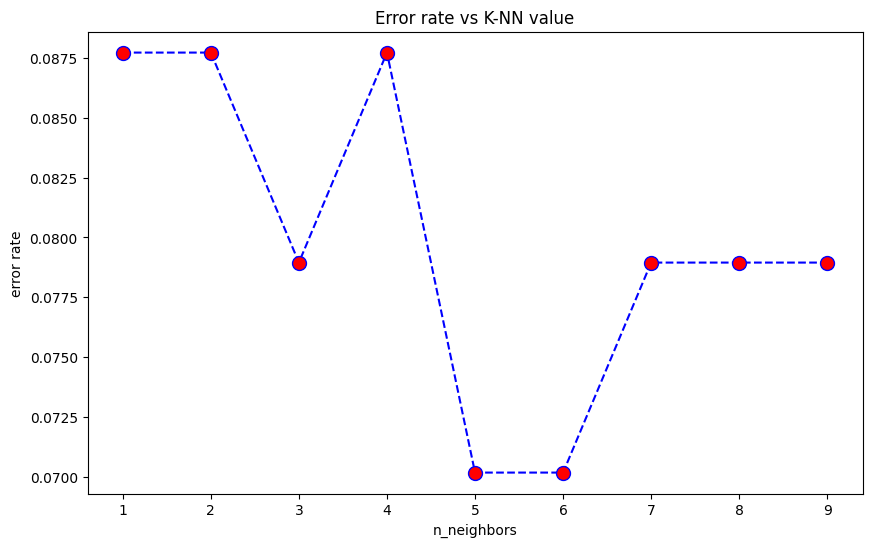

In [172]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
error_knn_pima = min(error_rate)

El punto más cercano a la zona de abajo será el vecino con el menor índice de error y por tanto el más cercano.

### K-NN para wdbc:

Se repite el mismo proceso de antes:

['B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'M']
Precisión: 0.9210526315789473
[[66  5]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.94      0.93      0.94        71
           M       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Error Mínimo:  0.07017543859649122 en n_neighbor:  2


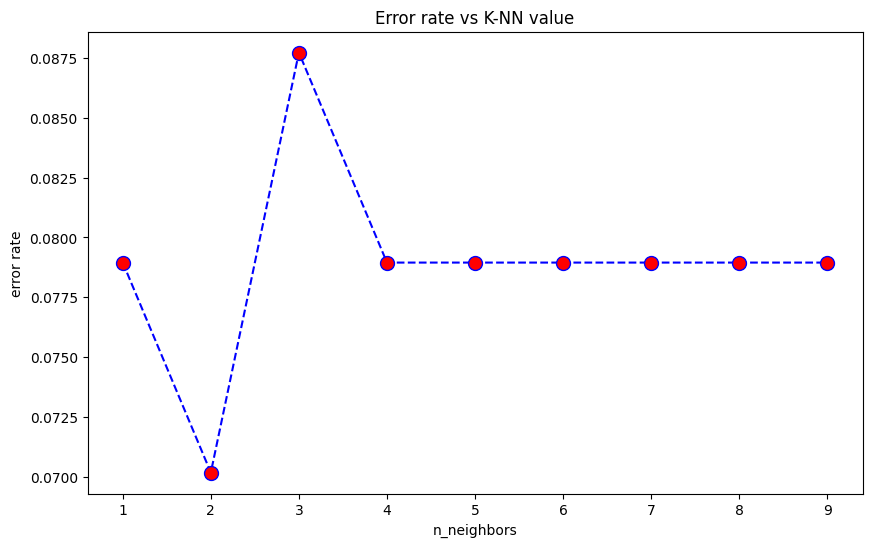

In [173]:
X = dataset2[['Atributo1','Atributo2','Atributo3','Atributo4','Atributo5','Atributo6','Atributo7','Atributo8','Atributo9','Atributo10','Atributo11','Atributo12','Atributo13','Atributo14','Atributo15'
              ,'Atributo16','Atributo17','Atributo18','Atributo19','Atributo20','Atributo21','Atributo22','Atributo23','Atributo24','Atributo25','Atributo26','Atributo27','Atributo28','Atributo29','Atributo30']].values
y = dataset2[['Class']].values.ravel()

# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# | Verdaderos Positivos | Falsos negativos     |
# | Falsos Positivos     | Verdaderos Negativos |

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
error_knn_wdbc = min(error_rate)

### K-Means para iris:

Empiezo con las características:

In [45]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
dataset3.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Miro los valores descriptivos:

In [47]:
dataset3.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalizamos los valores y los guardo en una nueva variable:

In [48]:
dataset3_variable = dataset3.drop(['Class'], axis=1)
dataset3_norm = (dataset3_variable-dataset3_variable.min())/(dataset3_variable.max()-dataset3_variable.min())
print(dataset3_norm)

           SL        SW        PL        PW
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]


Valores descriptivos normalizados:

In [49]:
dataset3_norm.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Búsqueda de la cantidad óptima de clusters:
(Calculamos que tan parecidos son los individuos dentro de los clusters)

In [77]:
wcss = [] #Suma de los cuadrados

for i in range(1,5):
    kmeans = sk.cluster.KMeans(n_clusters= i, max_iter = 300)
    kmeans.fit(dataset3_norm)
    wcss.append(kmeans.inertia_)

Gráfico de Codo Jambú, el cual utilizamos para saber cual es el número de clusters óptimo, este es el punto en el que deja de disminuir drásticamente:

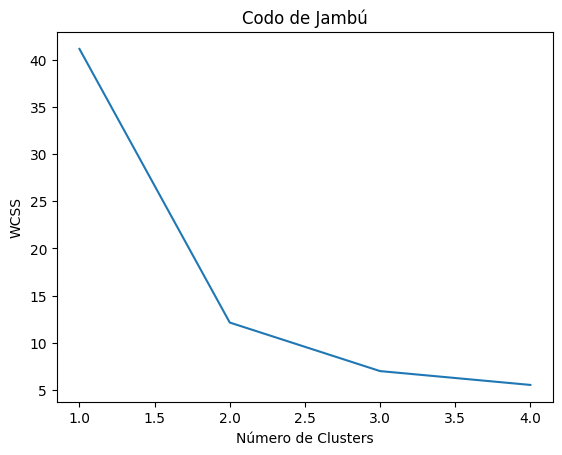

In [78]:
plt.plot(range(1,5),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

#### Aplico K-Means a la base de datos

In [79]:
clustering = sk.cluster.KMeans(n_clusters=3, max_iter = 300) #Crea el modelo
clustering.fit(dataset3_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

Agrego la clasificación al archivo original:

In [80]:
dataset3['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
print(dataset3)

      SL   SW   PL   PW           Class  KMeans_Clusters
0    5.1  3.5  1.4  0.2     Iris-setosa                1
1    4.9  3.0  1.4  0.2     Iris-setosa                1
2    4.7  3.2  1.3  0.2     Iris-setosa                1
3    4.6  3.1  1.5  0.2     Iris-setosa                1
4    5.0  3.6  1.4  0.2     Iris-setosa                1
..   ...  ...  ...  ...             ...              ...
145  6.7  3.0  5.2  2.3  Iris-virginica                2
146  6.3  2.5  5.0  1.9  Iris-virginica                0
147  6.5  3.0  5.2  2.0  Iris-virginica                2
148  6.2  3.4  5.4  2.3  Iris-virginica                2
149  5.9  3.0  5.1  1.8  Iris-virginica                0

[150 rows x 6 columns]


#### Clusters formados:
(Aplicaremos el análisis de componentes principales)

In [81]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(dataset3_norm)
pca_iris_df = pd.DataFrame(data = pca_iris, columns = ['Componente_1','Componente_2'])
pca_ir = pd.concat([pca_iris_df, dataset3[['KMeans_Clusters']]], axis=1)

print(pca_ir)

     Componente_1  Componente_2  KMeans_Clusters
0       -0.630361      0.111556                1
1       -0.623546     -0.100313                1
2       -0.669793     -0.047220                1
3       -0.654633     -0.098791                1
4       -0.648263      0.137558                1
..            ...           ...              ...
145      0.551755      0.058990                2
146      0.406278     -0.172227                0
147      0.447293      0.036996                2
148      0.489218      0.149121                2
149      0.312079     -0.031151                0

[150 rows x 3 columns]


Creo la gráfica:

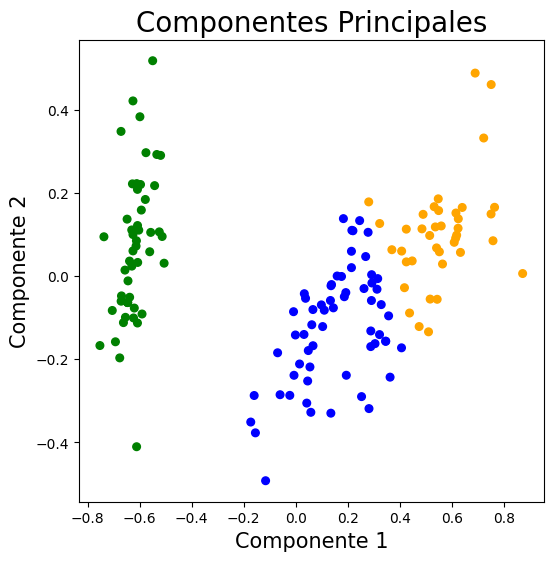

In [82]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_ir.Componente_1, y=pca_ir.Componente_2, c=color_theme[pca_ir.KMeans_Clusters], s=30)

plt.show()

### Comparación de nuestros algoritmos y Scikit-learn:

Estos eran los errores para pima-indians-diabetes con nuestro algoritmo:

In [25]:
print('Para K = 1:')
print('Error para pima-indians-diabetes k=1: ' + err_diabetes_k1)
print('Error para pima-indians-diabetes k=1 normalizado: ' + err_diabetes_k1_norm)
print('\nPara K = 3:')
print('Error para pima-indians-diabetes k=3: ' + err_diabetes_k3)
print('Error para pima-indians-diabetes k=3 normalizado: ' + err_diabetes_k3_norm)
print('\nError para K = 5:')
print('Error para pima-indians-diabetes k=5: ' + err_diabetes_k5)
print('Error para pima-indians-diabetes k=5 normalizado: ' + err_diabetes_k5_norm)

Para K = 1:
Error para pima-indians-diabetes k=1: 37.89%
Error para pima-indians-diabetes k=1 normalizado: 34.61%

Para K = 3:
Error para pima-indians-diabetes k=3: 33.33%
Error para pima-indians-diabetes k=3 normalizado: 32.37%

Error para K = 5:
Error para pima-indians-diabetes k=5: 31.47%
Error para pima-indians-diabetes k=5 normalizado: 30.53%


Error para pima-indians-diabetes con sk:

In [174]:
print('Error de KNN de SK en pima-indians-diabetes: ', f'{error_knn_pima*100:.2f}', '%')

Error de KNN de SK en pima-indians-diabetes:  7.02 %


 - Si comparamos el error mínimo de sk con nuestro error se puede observar una gran diferencia, de normalmente el 25% con la mejor ejecución, esto quiere decir que aunque nuestro algoritmo si funcione para pima-indians-diabetes no es tan efeciento como podría llegar a ser. Aun así creemos que aunque no sea lo más óptimo posible, si es una eficiencia útil para algunos estudios.

Estos eran los errores para wdbc con nuestro algoritmo:

In [163]:
print('Para K = 1:')
print('Error para wdbc k=1: ' + err_wdbc_k1)
print('Error para wdbc k=1 normalizado: ' + err_wdbc_k1_norm)
print('\nPara K = 3:')
print('Error para wdbc k=3: ' + err_wdbc_k3)
print('Error para wdbc k=3 normalizado: ' + err_wdbc_k3_norm)
print('\nError para K = 5:')
print('Error para wdbc k=5: ' + err_wdbc_k5)
print('Error para wdbc k=5 normalizado: ' + err_wdbc_k5_norm)

Para K = 1:
Error para wdbc k=1: 9.29%
Error para wdbc k=1 normalizado: 7.68%

Para K = 3:
Error para wdbc k=3: 5.90%
Error para wdbc k=3 normalizado: 5.96%

Error para K = 5:
Error para wdbc k=5: 6.01%
Error para wdbc k=5 normalizado: 6.06%


Error para wdbc con sk:

In [175]:
print('Error de KNN de SK en wdbc: ', f'{error_knn_wdbc*100:.2f}', '%')

Error de KNN de SK en wdbc:  7.02 %


- Al contrario de como ocurre con el caso de pima-indians-diabetes, en wdbc obtenemos resultados muy parecidos a los de SK, llegando incluso en algunas ocasiones a obtener un error menor, por lo que para la ejecución con wdbc pensamos que tiene una eficiencia muy buena y totalmente aceptable.

Estos eran los errores para iris con nuestro algoritmo:

In [176]:
print('Para K = 1:')
print('Error para iris k=1: ' + err_iris_k1)
print('Error para iris k=1 normalizado: ' + err_iris_k1_norm)
print('\nPara K = 3:')
print('Error para iris k=3: ' + err_iris_k3)
print('Error para iris k=3 normalizado: ' + err_iris_k3_norm)
print('\nError para K = 5:')
print('Error para iris k=5: ' + err_iris_k5)
print('Error para iris k=5 normalizado: ' + err_iris_k5_norm)

Para K = 1:
Error para iris k=1: 5.94%
Error para iris k=1 normalizado: 6.05%

Para K = 3:
Error para iris k=3: 6.02%
Error para iris k=3 normalizado: 6.36%

Error para K = 5:
Error para iris k=5: 6.19%
Error para iris k=5 normalizado: 6.56%


Error para iris con sk:

- El error obtenido con SK, como se puede apreciar en el gráfico creado está normalmente cerca del 1%, asi que nuestra implementación no llega a tal eficiencia pensamos que un 6% o 7%, que es el error que solemos obtener sigue siendo una eficiencia aceptable y con la cual se puede trabajar.

### Conclusión:

Aunque no hayamos obtenido una eficiencia la cual compita con sk en cualquier caso y que funcione igual para cualquier dataset, si creemos que hemos llegado a obtener unas eficiencias que son correctas para el trabajo de los datasets proporcionados y que funcionan de forma correcta. En resumen, no obtenemos una eficiencia máxima pero si una con la cual se puede trabajar.